<a href="https://colab.research.google.com/github/richardnixonafj/Python-and-Statistics-101-Class-Notes/blob/main/colab_Python_and_Statistics_101_First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python-and-Statistics-101-Class-Notes

##### Não é permitido o uso de métodos nem funções prontos na linguagem Python que calculam diretamente os resultados (média, mediana, variância, desvio padrão, MAD e valores de correlação). Cálculos de quantidade de elementos e soma dos elementos podem sim ser realizados por meio de funções já fornecidas pela própria linguagem.

##### As análises acimas compõem os resultados mínimos esperados no trabalho, então sinta-se incentivado a realizar análises extras. Note que, de acordo com as análises extras que você decidir realizar, este trabalho introduz o conceito de variáveis categóricas (variáveis que assumem valores específicos, não contínuos - como palavras). Um link que pode vir a ser útil é o seguinte: https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

##### Deverá ser montada uma apresentação de, no máximo, 10 minutos por grupo (cada grupo deve conter, no máximo, 3 pessoas). Essa apresentação deve conter apenas análises e resultados, não podendo ser apresentados trechos de código. Entretanto, o grupo deve ter o código disponível e pronto para execução caso o professor avaliador deseje esclarecimentos sobre alguma técnica ou trecho de código.

In [9]:
import pandas as pd
import random
import statistics as st
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv("drive/My Drive/StudentsPerformance.csv")

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
print (df.shape)

(1000, 8)


In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [16]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

TypeError: ignored

In [ ]:
profile

#### Cálculos de média, média aparada, média ponderada e mediana

In [17]:
math = df['math score'].sort_values(ascending=True)
reading = df['reading score'].sort_values(ascending=True)
writing = df['writing score'].sort_values(ascending=True)

In [18]:
# Média Math
avg_math = math.sum() / len(math)

# Média Reading
avg_reading = reading.sum() / len(reading)

# Média Writing
avg_writing = writing.sum() / len(writing)

print(f"Avg Math {avg_math} \nAvg Writing {avg_writing} \nAvg Reading {avg_reading}")

Avg Math 66.089 
Avg Writing 68.054 
Avg Reading 69.169


In [19]:
# Mediana

#median_math = math.median()
#print(f"Median Math: {median_math}")

#valor1 = math[500]
#valor2 = math[501]

valor1 = math[250:500]
valor2 = math[501:751]

mediana_manual = (valor1.sum() + valor2.sum()) / 500
print (f"Mediana Manual: {mediana_manual}")


Mediana Manual: 66.446


In [20]:
# Média aparada/Média truncada
# retirar os 100 maiores e 100 menores elementos (representa 10% cada parte)
math_range = math[100:900]
writing_range = writing[100:900]
reading_range = reading[100:900]

aparada_math = math_range.sum() / len(math_range)
aparada_writing = writing_range.sum() / len(writing_range)
aparada_reading = reading_range.sum() / len(reading_range)

print(f"**Médias Aparada**\nMath {aparada_math} \nReading {aparada_reading} \nWriting {aparada_writing}")

**Médias Aparada**
Math 66.3775 
Reading 69.50125 
Writing 68.4075


In [21]:
# Média ponderada

numbers_weights = [0.5, 1.5, 2, 3.5, 8]
weights = random.choices(numbers_weights, weights=(15, 5, 2, 40, 6), k=1000)

podenrada_math = sum(math*weights) / sum(weights)
podenrada_reading = sum(reading*weights) / sum(weights)
podenrada_writing = sum(writing*weights) / sum(weights)

print(f"**Médias Ponderadas**\n Math:{podenrada_math} \n Reading: {podenrada_reading} \n Writing {podenrada_writing}")

**Médias Ponderadas**
 Math:66.22372769332452 
 Reading: 69.29246530072703 
 Writing 68.194646397885


#### Cálculos de variância, desvio padrão e MAD de cada disciplina;

In [22]:
#Variância
#variance = st.variance(math)
#print(f"variance Math {variance}")


#Desvio padrão
#stdev = st.stdev(math)
#print(f"tdev Math {stdev}")
##################################################

dpMath = [(math[k] - avg_math) ** 2 for k in range(0, len(math))]

#Soma dividida pela quantidade de elementos
varMath = sum(dpMath) / len(math)

dpMath = (varMath) ** 0.5

print(f"Variância: {varMath} \nDesvio padrão: {dpMath}")



# Desvio Padrão Absoluto da Média (MAD - Mean Absolute Deviation)
y = math_mad = math.mad()

x = [(math[k] - avg_math) % avg_math for k in range(0, len(math))]



#Desvio Padrão Médiano
#mad_pd = pd.Series(math)
#mad_pd = (mad_pd - mad_pd.median()).abs().median()



print(f"automatico: {y} \n{x} ")




Variância: 229.68907900000048 
Desvio padrão: 15.155496659628165
automatico: 12.020245999999998 
[5.911000000000001, 2.9110000000000014, 23.911, 47.0, 9.911000000000001, 4.911000000000001, 21.911, 40.0, 64.0, 38.0, 58.0, 40.0, 65.0, 11.911000000000001, 50.0, 2.9110000000000014, 21.911, 18.0, 46.0, 54.0, 66.0, 65.0, 44.0, 2.9110000000000014, 7.911000000000001, 6.911000000000001, 2.9110000000000014, 0.9110000000000014, 3.9110000000000014, 62.0, 2.9110000000000014, 63.0, 56.0, 40.0, 30.911, 14.911000000000001, 7.911000000000001, 50.0, 8.911000000000001, 57.0, 55.0, 58.0, 53.0, 59.0, 50.0, 65.0, 55.0, 66.0, 57.0, 15.911000000000001, 53.0, 10.911000000000001, 53.0, 21.911, 4.911000000000001, 33.0, 15.911000000000001, 52.0, 58.0, 0.0, 12.911000000000001, 39.0, 62.0, 2.9110000000000014, 59.0, 0.9110000000000014, 45.0, 60.0, 61.0, 39.0, 58.0, 63.0, 41.0, 61.0, 49.0, 44.0, 30.0, 13.911000000000001, 61.0, 62.0, 47.0, 49.0, 50.0, 5.911000000000001, 42.0, 6.911000000000001, 9.911000000000001, 4.91

#### Exibição dos histogramas de cada disciplina;

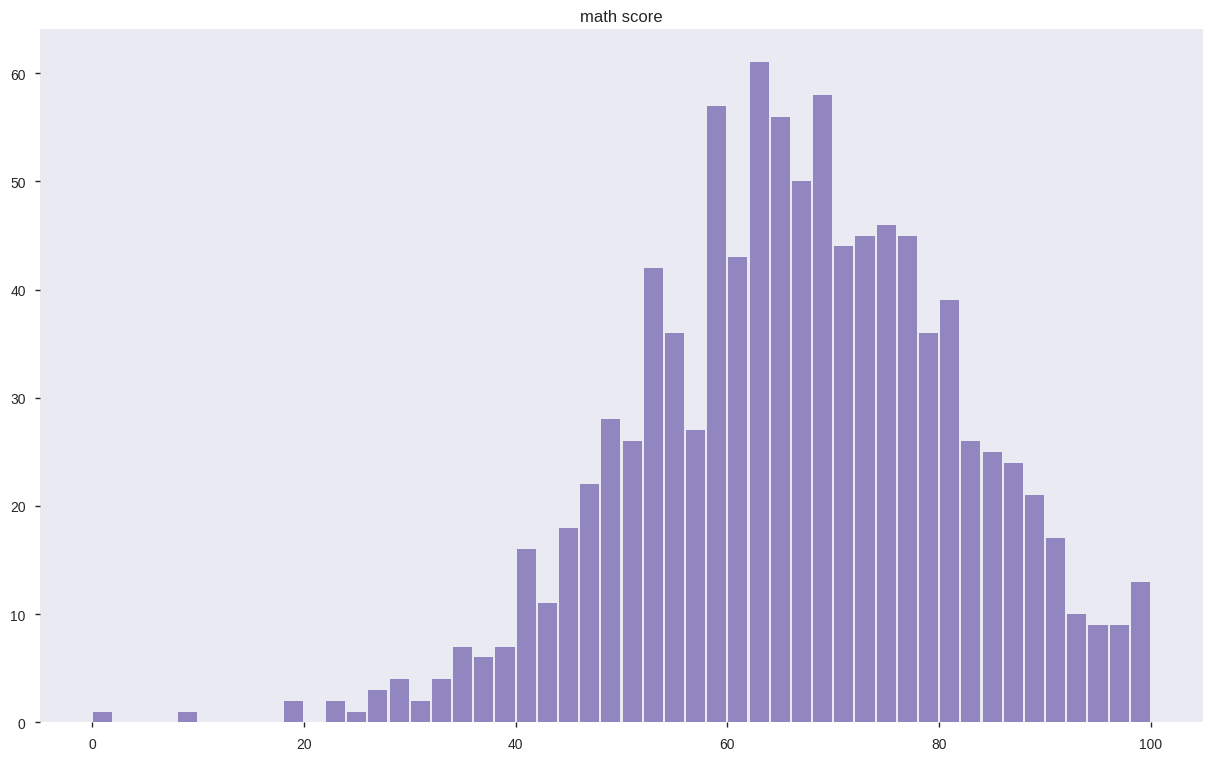

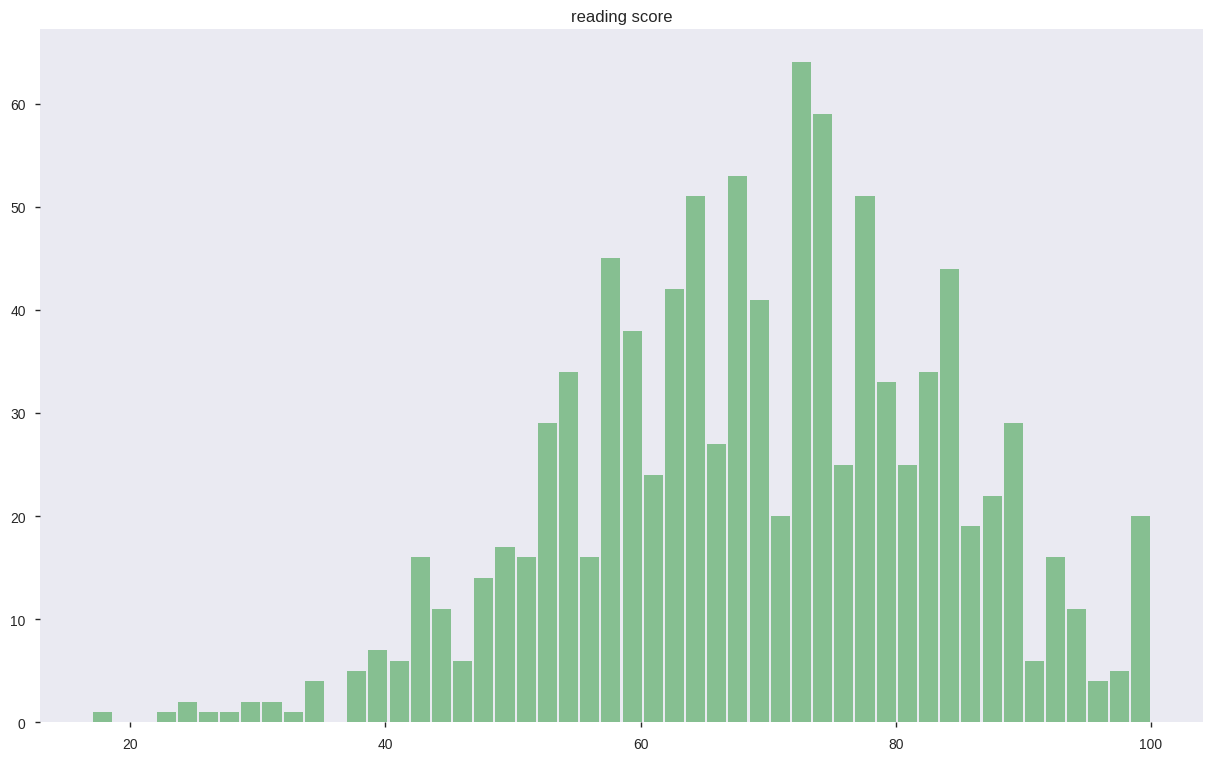

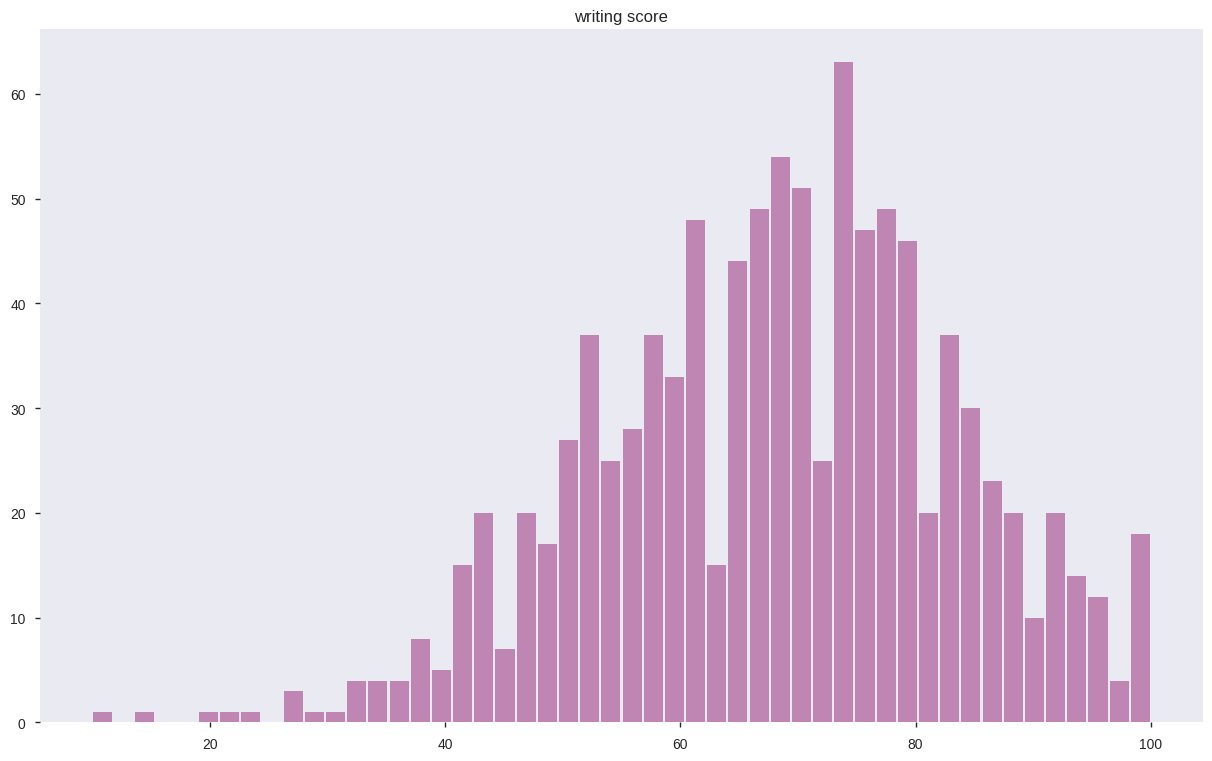

In [23]:
math_hist    = df.hist(column='math score',    bins=50, grid=False, figsize=(15,9), color='#9186bf', rwidth=0.9)
reading_hist = df.hist(column='reading score', bins=50, grid=False, figsize=(15,9), color='#86bf91', rwidth=0.9)
writing_hist = df.hist(column='writing score', bins=50, grid=False, figsize=(15,9), color='#bf86b4', rwidth=0.9)

#### Cálculo da matriz de correlação e exibição do respectivo mapa de calor de todas as disciplinas;

#### Visualização 3D das notas das disciplinas separadas por cada grupo de estudantes de acordo com "gender", "race/ethnicity", "parental level of education", "lunch" e "test preparation course". Para cada um desses parâmetros, realize uma única visualização (colocando os pontos de cada grupo em uma cor). Ao final, discorra se há algum padrão que pode ser detectado nessas análises;

#### Escreva suas conclusões sobre o dataset e quais métricas você julga mais interessantes, ou seja, forneça informações úteis para a tomada de decisões de um diretor de escola.

referencias
https://github.com/janiosl/python.ds/blob/master/estatistica/estatistica_basica.ipynb

https://stackoverflow.com/questions/60092641/mad-results-differ-in-pandas-scipy-and-numpy